# Задание для защиты итоговой аттестации
---
## Общие требования к оформлению
На защиту необходимо подготовить презентацию в формате pdf и архив со всеми
данными и скриптами.

Презентация должна содержать следующую информацию:
- Цели и Задачи работы
- Исследование (анализ литературы, существующие решения, сложности и
современное состояния данного вопроса)
- Презентация решения
- Выводы
- Рекомендации по улучшению и дальнейшему развитию

Презентация должна содержать не более 15 слайдов. Само выступление должно быть
не более 10 мин

Архив должен содержать:
- Файл readme с описанием всех скриптов и инструкцией по использованию
проекта. Пример хорошего readme
https://gist.github.com/bzvyagintsev/0c4adf4403d4261808d75f9576c814c2
- Все данные, которые были использованы в проекте. Данные не должны
содержать личные характеристики реальных людей
- Скрипты, настроечные файлы
## Задание
Рекомендуем исследование оформлять в jupyter notebook с текстовыми пояснениями и
выводами (маркдаунами). Код без комментариев и выводов не принимается к защите.
1. Для проведения исследования требуется выбрать данные, которые не содержат
персональных характеристик реальных людей. Рекомендуем выбирать данные
из наборов, доступных на Kaggle или других источниках данных. Использование
выбранного набора данных необходимо согласовать с вашим наставником.
2. Проведение разведочного анализа данных (EDA)
- a. Необходимо рассчитать статистики (например, медиана, дисперсия,
квантили и так далее)
- b. Построить полезные графики
- c. Сделать выводы
3. Предобработка данных.
- a. Если в данных есть пропущенные значения, необходимо их обработать
- b. Если в данных есть выбросы, необходимо их обработать
- c. Если в данных есть категориальные значения, необходимо их
обработать
- d. Если признаков очень много, воспользуетесь методами отбора признаков
или методами понижения размерности (например, PCA)
4. Проверка статистических гипотез.
- a. Необходимо сформулировать на данных минимум 2 гипотезы и
проверить их с помощью статистических критериев
5. Построение моделей машинного обучения. Необходимо построить минимум 5
моделей машинного обучения с использованием следующих алгоритмов
(необходимо использовать разные алгоритмы)
- a. Линейная регрессия/логистическая регрессия
- b. Метод knn
- c. Дерево решений
- d. Random forest
- e. Градиентный бустинг (можно любой фреймворк, либо sklearn, xgboost,
lightgbm, catboost)
6. Сравнить полученные модели с помощью метрик качества. Выбрать лучшую
модель. Сделать выводы. Выгрузить лучшую модель из блокнота jupyter
(например, с помощью библиотеки joblib или pickle).
7. Описать как планируется использовать модель после выгрузки. Создать еще
один блокнот jupyter (или код на языке python в файле *.py) и загрузить модель
для использования (например, с помощью библиотеки joblib). Должна быть
реализована следующая логика:
- a. Пользователь вводит данные
- b. Далее запускаем ячейку в jupyter notebook или запускаем файл *.py
- c. Получаем ответ модели и рекомендации
Дополнительно. Возможна реализация использования модели не в jupyter notebook
или файле python *.py, а с применением библиотеки Streamlit (или аналогичных).
---
## Шкала оценивания:
**Оценки 1/«отлично»** заслуживает работа, в которой полностью и всесторонне
раскрыто содержание программы обучения, обоснован выбор модели, представлен
работающий код, содержится творческий подход к решению вопросов, сделаны
обоснованные предложения и на все вопросы при защите слушатель дал
аргументированные ответы. Проект соответствует указанным показателям.

**Оценки 0.8/«хорошо»** заслуживает работа, в которой содержание изложено на
высоком уровне, правильно сформулированы выводы и даны обоснованные
предложения, на все вопросы слушатель дал правильные ответы. Проект в большей
степени соответствует указанным показателям.

**Оценки 0.5/«удовлетворительно»** заслуживает работа, в которой в основном
раскрыто содержание программы обучения, выводы в основном правильные.
Предложения представляют интерес, но недостаточно аргументированы и на все
вопросы слушатель дал правильные ответы. Проект в целом соответствует указанным
показателям.

**Оценки 0/«неудовлетворительно»** заслуживает работа, которая в основном
раскрывает поставленную тему, но при защите слушатель не дал правильных ответов
на большинство заданных вопросов, то есть обнаружил серьезные пробелы в
профессиональных знаниях, либо в проекте не проведено ни одного эксперимента.
Проект не соответствует указанным показателям.

In [2]:
# Объявление библиотек 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, accuracy_score, classification_report
from category_encoders import TargetEncoder

from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor

from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings("ignore")

Датасет https://www.kaggle.com/datasets/egorkainov/moscow-housing-price-dataset/data?select=data.csv

In [5]:
# Загрузка данных
df = pd.read_csv('data.csv')

## Описание столбцов

**Price** - Цена: цена квартиры в указанной валюте. Это основная целевая переменная для прогнозирования.

**Apartment type** - Квартира тип: тип квартиры, например студия, квартира с одной спальней, квартира с двумя спальнями и т. д.

**Metro station** - Станция метро: название ближайшей к квартире станции метро.

**Minutes to metro** - Минуты до метро: время в минутах, необходимое для того, чтобы дойти от квартиры до ближайшей станции метро.

**Region** - Регион: регион, в котором находится квартира (Москва или Московская область).

**Number of rooms** - Количество комнат: общее количество комнат в квартире, включая спальни, гостиные и т. д.

**Area** - Площадь: общая площадь квартиры в квадратных метрах.

**Living area** - Жилая площадь: Жилая площадь квартиры в квадратных метрах, то есть площадь, пригодная для проживания.

**Kitchen area** - Площадь кухни: Площадь кухни в квадратных метрах.

**Floor** - Этаж: этаж, на котором расположена квартира.

**Number of floors** - Количество этажей: общее количество этажей в здании, где расположена квартира.

**Renovation** - Ремонт: Уровень ремонта в квартире, например «без ремонта», «косметический ремонт», «евроремонт» и т. д.

## Анализ данных

In [9]:
# Просмотр датасета
df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [11]:
# Замена пробелов в названиях столбцов
df.rename(columns = lambda x: x.replace(' ', "_"), inplace = True)
df.head()

,Price,Apartment_type,Metro_station,Minutes_to_metro,Region,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.6,11.1,8.5,25.0,25,Cosmetic
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.2,20.0,10.0,6.0,15,European-style renovation
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.7,16.2,13.1,10.0,25,Cosmetic
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.1,16.0,11.0,12.0,33,European-style renovation
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.7,15.2,4.0,5.0,5,Without renovation


In [13]:
target = 'Price'
cat_features = df.select_dtypes(include='object').columns.tolist()
num_features = df.select_dtypes(include='number').columns.tolist()
print(cat_features)
print(num_features)

['Apartment_type', 'Metro_station', 'Region', 'Renovation']
['Price', 'Minutes_to_metro', 'Number_of_rooms', 'Area', 'Living_area', 'Kitchen_area', 'Floor', 'Number_of_floors']


In [15]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment_type    22676 non-null  object 
 2   Metro_station     22676 non-null  object 
 3   Minutes_to_metro  22676 non-null  float64
 4   Region            22676 non-null  object 
 5   Number_of_rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living_area       22676 non-null  float64
 8   Kitchen_area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number_of_floors  22676 non-null  int64  
 11  Renovation        22676 non-null  object 
dtypes: float64(7), int64(1), object(4)
memory usage: 7.1 MB


In [17]:
# Количество строк и столбцов 
df.shape

(22676, 12)

In [19]:
df.describe()

,Price,Minutes_to_metro,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors
count,2.267600e+04,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000,22676.000000
mean,3.612132e+07,11.888605,2.043129,71.966827,38.517953,12.594082,9.190466,16.556095
std,8.282561e+07,6.204457,1.523586,68.368608,38.124278,7.728074,7.549996,9.779297
min,1.150000e+06,0.000000,0.000000,6.000000,2.000000,1.000000,1.000000,1.000000
25%,7.068116e+06,7.000000,1.000000,37.400000,17.600000,8.600000,4.000000,11.000000
50%,1.134320e+07,11.000000,2.000000,53.300000,28.500000,10.600000,8.000000,16.000000
75%,2.479925e+07,15.000000,3.000000,77.140000,43.200000,14.500000,13.000000,20.000000
max,2.455020e+09,60.000000,12.000000,1117.000000,566.800000,122.000000,92.000000,97.000000


In [21]:
#Проверка пустных значений
df.isna().sum()

Price               0
Apartment_type      0
Metro_station       0
Minutes_to_metro    0
Region              0
Number_of_rooms     0
Area                0
Living_area         0
Kitchen_area        0
Floor               0
Number_of_floors    0
Renovation          0
dtype: int64

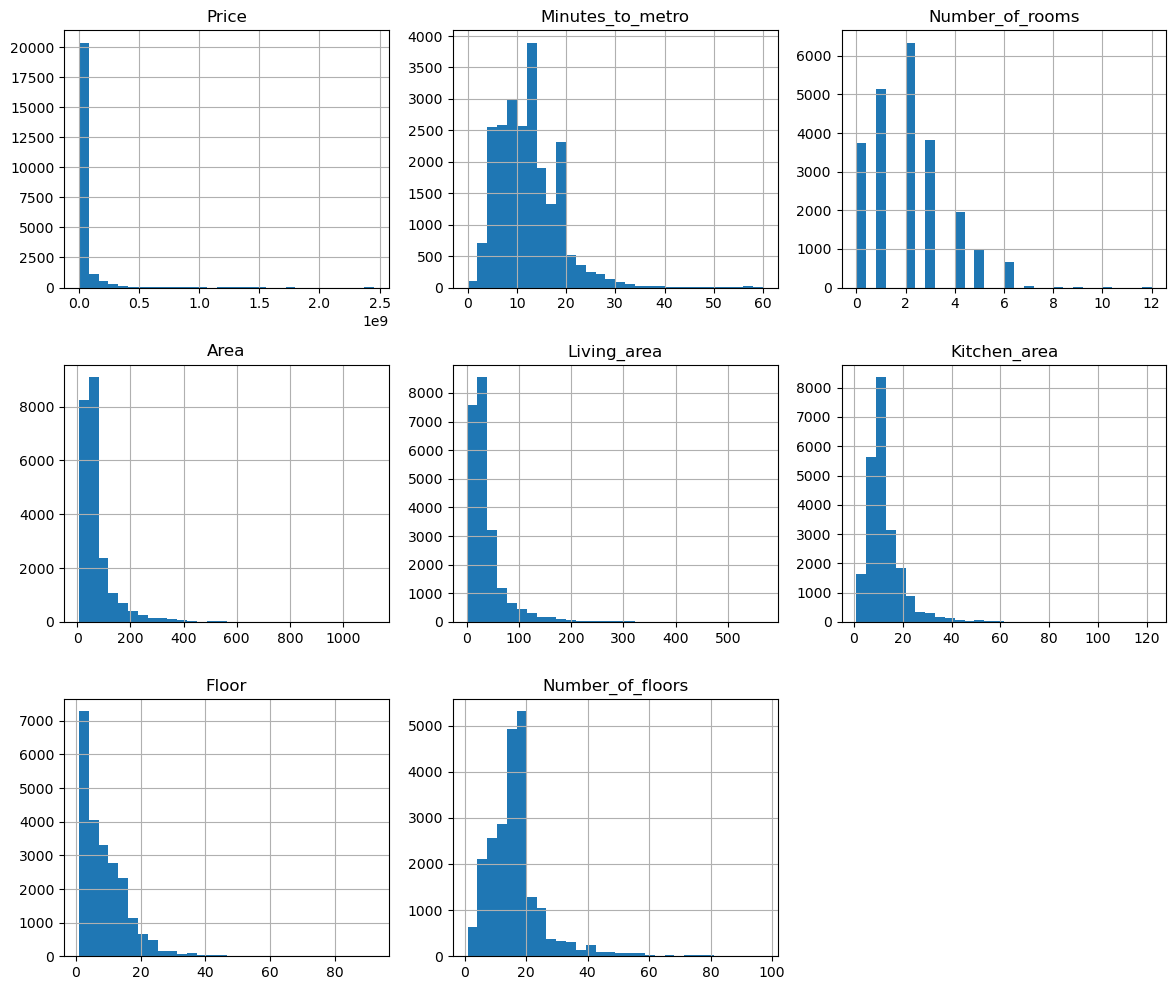

In [23]:
# Визуализация распределений числовых признаков
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

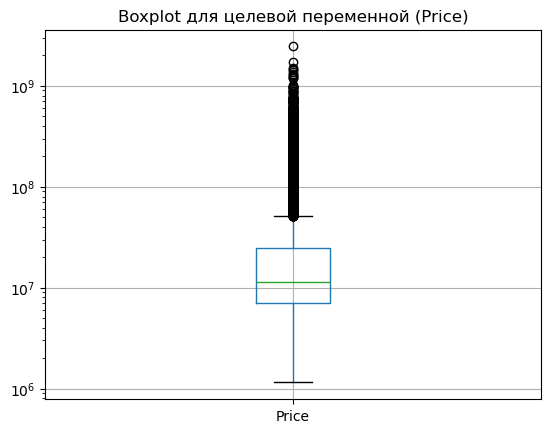

In [25]:
# boxplot
df.boxplot(column='Price')
plt.title('Boxplot для целевой переменной (Price)')
plt.yscale('log')
plt.show()

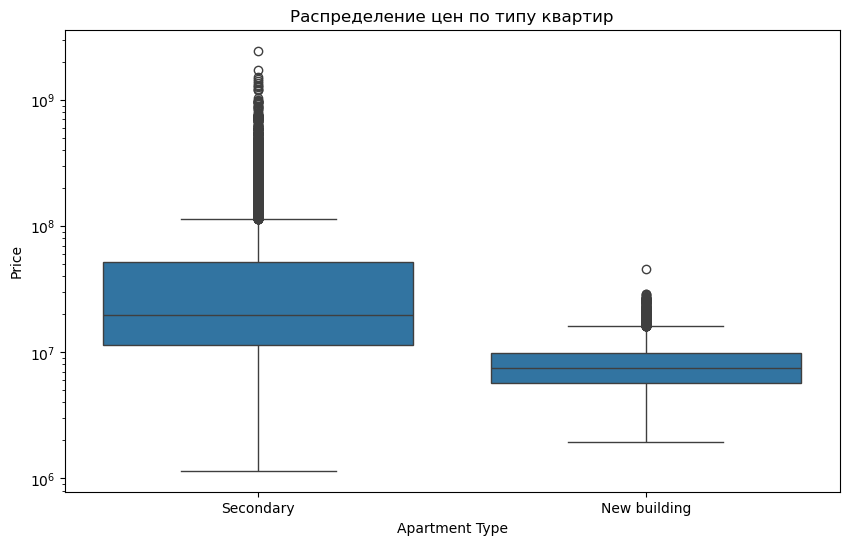

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Apartment_type', y='Price', data=df)
plt.title('Распределение цен по типу квартир')
plt.ylabel('Price')
plt.xlabel('Apartment Type')
plt.yscale('log')  
plt.show()

1. Цены на квартиры двух типов сильно различаются, причем цены на "Вторичку", как правило, выше, чем на "Новостройки".

2. "Вторичка" отличается более широким межквартильным диапазоном и более высокой медианой, что в целом указывает на более высокие цены.

3. Оба распределения показывают выбросы, но более многочисленные и значимые для "вторичного" типа.

In [30]:
# Корреляция числовых признаков
corr_matrix = df.select_dtypes(include='number').corr()
corr_matrix

,Price,Minutes_to_metro,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors
Price,1.000000,-0.105382,0.490820,0.794226,0.709296,0.582940,0.019080,-0.022134
Minutes_to_metro,-0.105382,1.000000,-0.082357,-0.094937,-0.085614,-0.062436,0.017230,-0.031209
Number_of_rooms,0.490820,-0.082357,1.000000,0.687145,0.657565,0.476534,0.087446,0.074045
Area,0.794226,-0.094937,0.687145,1.000000,0.906604,0.731963,0.083480,0.044465
Living_area,0.709296,-0.085614,0.657565,0.906604,1.000000,0.610039,0.072477,0.036737
Kitchen_area,0.582940,-0.062436,0.476534,0.731963,0.610039,1.000000,0.133737,0.108035
Floor,0.019080,0.017230,0.087446,0.083480,0.072477,0.133737,1.000000,0.596803
Number_of_floors,-0.022134,-0.031209,0.074045,0.044465,0.036737,0.108035,0.596803,1.000000


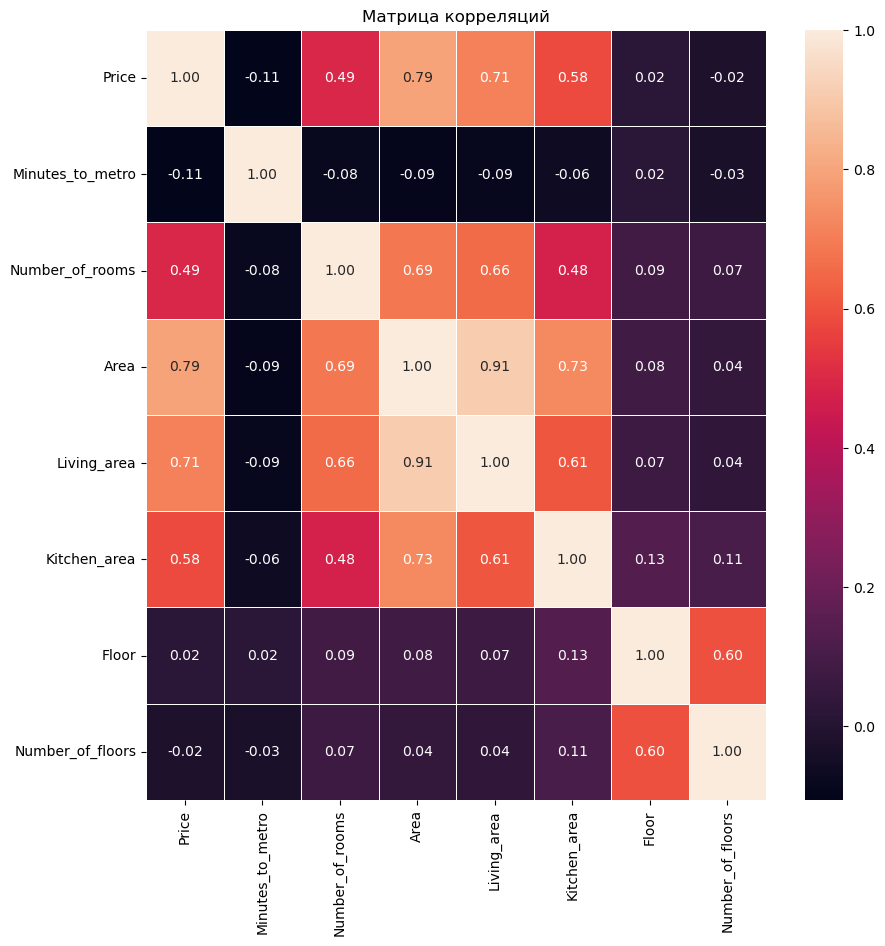

In [32]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, cbar=True)
plt.title('Матрица корреляций')
plt.show()

Самые большие значения корреляции между следующими признаками: Price/ Area, Living area, kitchen area, number of room

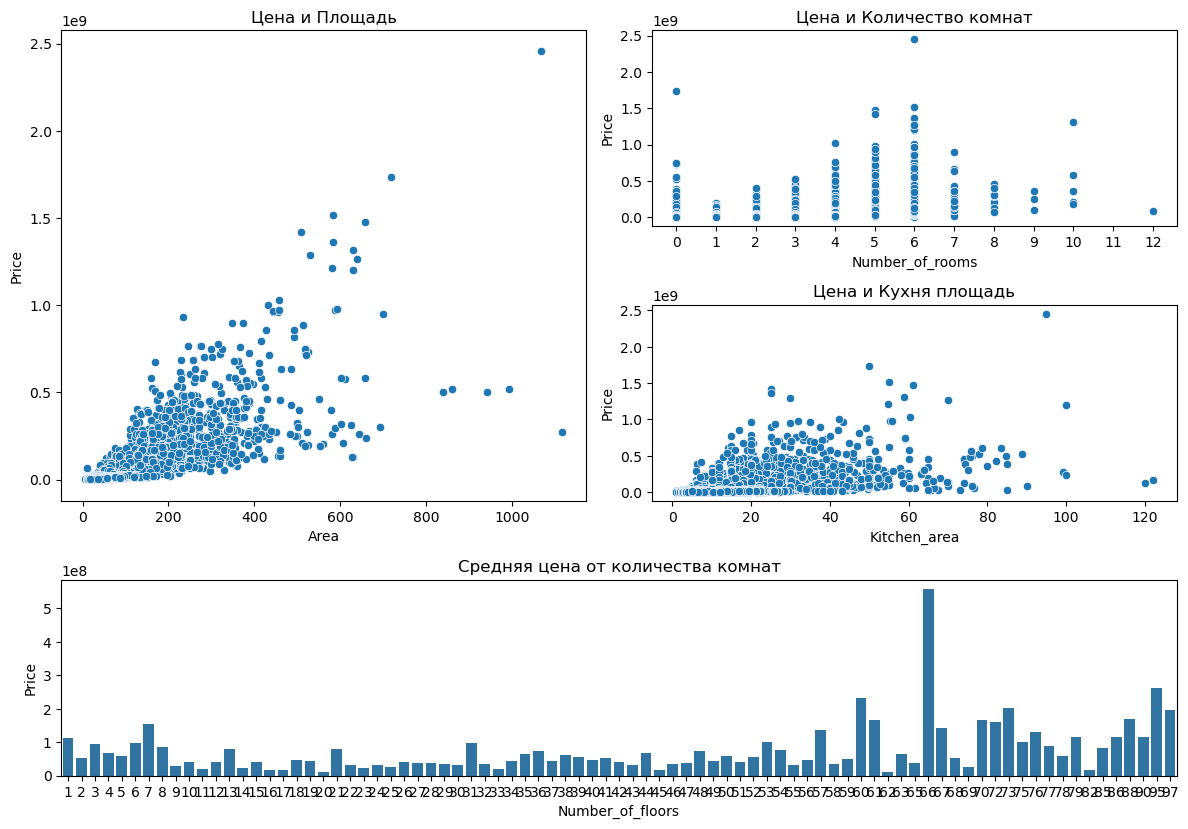

In [35]:
fig = plt.figure(figsize=(12, 16))

# График 1 - Взаимосвязь между ценой и площадью
ax3 = plt.subplot2grid((6, 2), (2, 0), rowspan = 2)
sns.scatterplot(data = df,
                x = 'Area',
                y = 'Price',
                ax = ax3)
ax3.set_title('Цена и Площадь')

# График 2 - Взаимосвязь между ценой и количеством комнат
ax2 = plt.subplot2grid((6, 2), (2, 1))
sns.scatterplot(data = df,
                x = 'Number_of_rooms',
                y = 'Price',
                ax = ax2)
ax2.set_xticks(range(0,13,1))
ax2.set_title('Цена и Количество комнат')


# График 3 - Взаимосвязь между ценой и площадью кухни
ax4 = plt.subplot2grid((6, 2), (3, 1))
sns.scatterplot(data = df,
                x = 'Kitchen_area',
                y = 'Price',
                ax = ax4)
ax4.set_title('Цена и Кухня площадь')


# График 4 - Средние значения цены в зависимости от количества комнат
ax5 = plt.subplot2grid((6, 2), (4, 0), rowspan = 1, colspan = 2)
price = df.groupby('Number_of_floors').agg({'Price' : 'mean'})
sns.barplot(data = price,
            x = price.index,
            y = price['Price'],
            ax = ax5)
ax5.set_title('Средняя цена от количества комнат')

plt.tight_layout()
plt.show()

# Сильные корреляции с ценой
Площадь квартиры (Area) имеет наибольшую положительную корреляцию с ценой: 0.79. Это означает, что увеличение площади, как правило, приводит к увеличению цены квартиры.

Жилая площадь (Living area) также сильно коррелирует с ценой: 0.71. Это логично, так как полезная площадь — важный фактор для оценки стоимости.

Площадь кухни (Kitchen area) находится чуть ниже (0.58), но также заметно влияет на цену.

Количество комнат (Number of rooms) — умеренно положительная корреляция: 0.49. Больше комнат обычно означает более дорогую квартиру.

# Незначимые и отрицательные связи
Время до метро (Minutes to metro) показывает слабую отрицательную корреляцию с ценой: -0.11. Ближе к метро — немного дороже, но связь довольно слабая.

Этаж (Floor) и Количество этажей в доме (Number of floors) практически не коррелируют с ценой (0.02 и -0.02 соответственно). Можно сделать вывод, что эти параметры не оказывают существенного влияния на стоимость квартиры для данного датасета.


## Обработка данных

In [38]:
# Проверка дубликатов строк 
num_duplicates = df.duplicated().sum()
num_duplicates

1835

In [41]:
# Удаление дубликатов строк 
df = df.drop_duplicates()

In [43]:
df.isna().sum()

Price               0
Apartment_type      0
Metro_station       0
Minutes_to_metro    0
Region              0
Number_of_rooms     0
Area                0
Living_area         0
Kitchen_area        0
Floor               0
Number_of_floors    0
Renovation          0
dtype: int64

In [45]:
# Создание числовых призноков вместо столбца Apartment_type
Apartment_type_dummies = pd.get_dummies(df['Apartment_type'], prefix='Apartment_type', dtype=int)

df = pd.concat([df, Apartment_type_dummies], axis=1)
df

,Price,Apartment_type,Metro_station,Minutes_to_metro,Region,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Renovation,Apartment_type_New building,Apartment_type_Secondary
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic,0,1
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation,0,1
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic,0,1
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation,0,1
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,New building,Котельники,8.0,Moscow region,1.0,44.17,24.5,10.3,4.0,17,Cosmetic,1,0
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic,1,0
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic,1,0
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic,1,0


In [47]:
# Создание числовых призноков вместо столбца Region
Region_dummies = pd.get_dummies(df['Region'], prefix='Region', dtype=int)

df = pd.concat([df, Region_dummies], axis=1)
df

,Price,Apartment_type,Metro_station,Minutes_to_metro,Region,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Renovation,Apartment_type_New building,Apartment_type_Secondary,Region_Moscow,Region_Moscow region
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic,0,1,0,1
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation,0,1,0,1
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic,0,1,0,1
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation,0,1,0,1
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,New building,Котельники,8.0,Moscow region,1.0,44.17,24.5,10.3,4.0,17,Cosmetic,1,0,0,1
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic,1,0,0,1
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic,1,0,0,1
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic,1,0,0,1


In [49]:
# Создание числовых призноков вместо столбца Renovation
Renovation_dummies = pd.get_dummies(df['Renovation'], prefix='Renovation', dtype=int)

df = pd.concat([df, Renovation_dummies], axis=1)
df

,Price,Apartment_type,Metro_station,Minutes_to_metro,Region,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Renovation,Apartment_type_New building,Apartment_type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6300000.0,Secondary,Опалиха,6.0,Moscow region,1.0,30.60,11.1,8.5,25.0,25,Cosmetic,0,1,0,1,1,0,0,0
1,9000000.0,Secondary,Павшино,2.0,Moscow region,1.0,49.20,20.0,10.0,6.0,15,European-style renovation,0,1,0,1,0,0,1,0
2,11090000.0,Secondary,Мякинино,14.0,Moscow region,1.0,44.70,16.2,13.1,10.0,25,Cosmetic,0,1,0,1,1,0,0,0
3,8300000.0,Secondary,Строгино,8.0,Moscow region,1.0,35.10,16.0,11.0,12.0,33,European-style renovation,0,1,0,1,0,0,1,0
4,6450000.0,Secondary,Опалиха,6.0,Moscow region,1.0,37.70,15.2,4.0,5.0,5,Without renovation,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,5884024.0,New building,Котельники,8.0,Moscow region,1.0,44.17,24.5,10.3,4.0,17,Cosmetic,1,0,0,1,1,0,0,0
22672,5900000.0,New building,Домодедовская,25.0,Moscow region,1.0,31.60,10.1,12.2,11.0,15,Cosmetic,1,0,0,1,1,0,0,0
22673,3700000.0,New building,Котельники,30.0,Moscow region,0.0,18.00,15.0,8.1,17.0,17,Cosmetic,1,0,0,1,1,0,0,0
22674,5768869.0,New building,Жулебино,14.0,Moscow region,2.0,36.39,22.0,6.6,12.0,14,Cosmetic,1,0,0,1,1,0,0,0


# Проверка статистических гипотез
Гипотеза 1: Влияние типа квартиры на цену

H0 (нулевая гипотеза): Средняя цена квартир "Вторичного рынка" и "Новостроек" не различается.

H1 (альтернативная гипотеза): Средняя цена квартир "Вторичного рынка" значительно отличается от средней цены "Новостроек".

---

Гипотеза 2: Влияние количества комнат на цену

H0: Средняя цена квартир с 1 комнатой равна средней цене квартир с 2 комнатами.

H1: Средняя цена квартир с 1 комнатой отличается от средней цены квартир с 2 комнатами.


In [52]:
alpha = 0.05
# Гипотеза 1: Средняя цена квартир вторичного рынка и новостроек одинаков
# H0: μ_Secondary = μ_New building (средние равны)
# H1: μ_Secondary ≠ μ_New building (средние различаются)

secondary_prices = df[df['Apartment_type'] == 'Secondary']['Price'].dropna()
new_building_prices = df[df['Apartment_type'] == 'New building']['Price'].dropna()

# Проверка: t-тест Стьюдента (две независимые выборки, нормальное распределение приближённо допустимо при n > 30)
t_stat, p_value = ttest_ind(secondary_prices, new_building_prices, equal_var=False)

print(f"Средняя цена квартир вторичного рынка: {np.round(secondary_prices.mean(), 2)}")
print(f"Средняя цена квартир новостроек: {np.round(new_building_prices.mean(), 2)}")
print(f"t-статистика: {np.round(t_stat, 3)}")
print(f"p-значение: {np.round(p_value, 5)}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу - средняя цена квартир вторичного рынка и новостроек различаются")
else:
    print("Не можем отвергнуть нулевую гипотезу - средняя цена квартир вторичного рынка и новостроек равны")

Средняя цена квартир вторичного рынка: 52255086.55
Средняя цена квартир новостроек: 8179494.21
t-статистика: 48.706
p-значение: 0.0
Отвергаем нулевую гипотезу - средняя цена квартир вторичного рынка и новостроек различаются


In [54]:
alpha = 0.05
# Гипотеза 1: Средняя цена однокомнатных и двукомнатных квартир одинаков
# H0: μ_1 = μ_2 (средние равны)
# H1: μ_1 ≠ μ_2 (средние различаются)

one_prices = df[df['Number_of_rooms'] == 1]['Price'].dropna()
two_prices = df[df['Number_of_rooms'] == 2]['Price'].dropna()

# Проверка: t-тест Стьюдента (две независимые выборки, нормальное распределение приближённо допустимо при n > 30)
t_stat, p_value = ttest_ind(one_prices, two_prices, equal_var=False)

print(f"Средняя цена однокомнатных квартир: {np.round(one_prices.mean(), 2)}")
print(f"Средняя цена двукомнатных квартир: {np.round(two_prices.mean(), 2)}")
print(f"t-статистика: {np.round(t_stat, 3)}")
print(f"p-значение: {np.round(p_value, 5)}")
if p_value < alpha:
    print("Отвергаем нулевую гипотезу - средняя цена однокомнатных и двукомнатных квартир различаются")
else:
    print("Не можем отвергнуть нулевую гипотезу - средняя цена однокомнатных и двукомнатных квартир равны")

Средняя цена однокомнатных квартир: 10931651.78
Средняя цена двукомнатных квартир: 15015706.24
t-статистика: -14.612
p-значение: 0.0
Отвергаем нулевую гипотезу - средняя цена однокомнатных и двукомнатных квартир различаются


## Построение моделей

In [57]:
# Разделение данных на трейн и тест
X = df.drop(columns=['Price', 'Renovation', 'Region', 'Apartment_type', 'Metro_station'])
y = df.Price

# Трейн/тест
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((16672, 15), (4169, 15))

In [59]:
X

,Minutes_to_metro,Number_of_rooms,Area,Living_area,Kitchen_area,Floor,Number_of_floors,Apartment_type_New building,Apartment_type_Secondary,Region_Moscow,Region_Moscow region,Renovation_Cosmetic,Renovation_Designer,Renovation_European-style renovation,Renovation_Without renovation
0,6.0,1.0,30.60,11.1,8.5,25.0,25,0,1,0,1,1,0,0,0
1,2.0,1.0,49.20,20.0,10.0,6.0,15,0,1,0,1,0,0,1,0
2,14.0,1.0,44.70,16.2,13.1,10.0,25,0,1,0,1,1,0,0,0
3,8.0,1.0,35.10,16.0,11.0,12.0,33,0,1,0,1,0,0,1,0
4,6.0,1.0,37.70,15.2,4.0,5.0,5,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22670,8.0,1.0,44.17,24.5,10.3,4.0,17,1,0,0,1,1,0,0,0
22672,25.0,1.0,31.60,10.1,12.2,11.0,15,1,0,0,1,1,0,0,0
22673,30.0,0.0,18.00,15.0,8.1,17.0,17,1,0,0,1,1,0,0,0
22674,14.0,2.0,36.39,22.0,6.6,12.0,14,1,0,0,1,1,0,0,0


### Линейная регрессия

In [62]:
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

y_pred = LR_model.predict(X_test)
print(f'R2: {r2_score(y_test, y_pred):.4f}')
print(f'MSE: {mean_squared_error(y_test, y_pred):.4f}')

param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LR_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')
print(f'Best hyperparameters: {grid.best_params_:}')

R2: 0.6414
MSE: 1987695813171758.5000
RMSE: 44583582.3277
Best hyperparameters: {'fit_intercept': True}


### Метод knn 

In [65]:
# Определяем диапазон гиперпараметров для knn
param_grid = {
    'n_neighbors': list(range(3, 21)),                 # Диапазон от 3 до 20, так как экстремальные 1 и >20 часто не эффективны
    'weights': ['uniform', 'distance'],                # Два варианта весов
    'p': [1, 2],                                       # Манхэттенская и Евклидова метрики
    'metric': ['minkowski', 'manhattan', 'euclidean']  # Общие метрики
}

KNN_model = KNeighborsRegressor()
KNN_model.fit(X_train, y_train)

# RandomizedSearchCV
grid = RandomizedSearchCV(
    KNN_model, param_distributions=param_grid, n_iter=30,
    scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1
)
grid.fit(X_train, y_train)

# Лучшая модель
best_KNN = grid.best_estimator_
y_pred = best_KNN.predict(X_test)

# Оценка на тесте
print(f"R2: {r2_score(y_test, y_pred):.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")
print("Best hyperparameters:", grid.best_params_)

R2: 0.6692
MSE: 1833349747331229.2500
RMSE: 42817633.6027
Best hyperparameters: {'weights': 'distance', 'p': 2, 'n_neighbors': 19, 'metric': 'manhattan'}


### Дерево решений

In [67]:
# Определяем диапазон гиперпараметров для дерева решений
param_grid = {
    'max_depth': [5, 10, 15, 20, None],           # Ограничение глубины дерева и без ограничения
    'min_samples_split': [2, 5, 10, 15],          # Минимальное количество объектов для разбиения узла
    'min_samples_leaf': [1, 2, 4, 6, 8],          # Минимум в листе для устойчивости модели
    'max_features': ['sqrt', 'log2', None]         # Число признаков для рассмотрения при разбиении
}


DTR_model = DecisionTreeRegressor(random_state=42)
DTR_model.fit(X_train, y_train)

# RandomizedSearchCV
grid = RandomizedSearchCV(
    DTR_model, param_distributions=param_grid, n_iter=30,
    scoring='neg_mean_squared_error', cv=5, random_state=42, n_jobs=-1
)
grid.fit(X_train, y_train)

# Лучшая модель
best_DTR = grid.best_estimator_

# Оценка на тесте
y_pred = best_DTR.predict(X_test)

print(f"R2: {r2_score(y_test, y_pred):.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")
print("Best hyperparameters:", grid.best_params_)

R2: 0.6482
MSE: 1950003214448159.5000
RMSE: 44158840.7281
Best hyperparameters: {'min_samples_split': 5, 'min_samples_leaf': 8, 'max_features': None, 'max_depth': 5}


### Random forest 

In [69]:
# Определяем диапазон гиперпараметров для Random forest
param_dist = {
    'n_estimators': [100, 200, 300],           # Количество деревьев в лесу
    'max_depth': [10, 15, 20, None],           # Максимальная глубина дерева или без ограничения
    'min_samples_split': [2, 5, 10],           # Минимальное число образцов для разбиения узла
    'min_samples_leaf': [1, 2, 4],              # Минимальное число образцов в листе
    'max_features': ['sqrt', 'log2']            # Число признаков для выбора при разбиении
}

RFR_model = RandomForestRegressor(random_state=42)
RFR_model.fit(X_train, y_train)

# RandomizedSearchCV
grid = RandomizedSearchCV(
    RFR_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Лучшая модель
best_RFR = grid.best_estimator_

# Оценка на тестовой выборке
y_pred = best_RFR.predict(X_test)

print(f"R2: {r2_score(y_test, y_pred):.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")
print("Best hyperparameters:", grid.best_params_)

R2: 0.7436
MSE: 1421258045680796.2500
RMSE: 37699576.2003
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


### Градиентный бустинг

In [73]:
# Определяем диапазон гиперпараметров для градиентного бустинга
param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],           # Маленькие значения для более устойчивого обучения
    'n_estimators': [100, 200, 300, 400],         # Количество деревьев
    'max_depth': [3, 4, 5, 6],                     # Глубина деревьев, лучше держать небольшой для бустинга
    'min_samples_split': [2, 4, 6],                # Минимальное кол-во образцов для разбиения узла
    'min_samples_leaf': [1, 2, 4],                 # Минимальное кол-во образцов в листе
    'subsample': [0.7, 0.8, 0.9, 1.0]              # Доля данных для каждой итерации бустинга для уменьшения переобучения
}

GBR_model = GradientBoostingRegressor(random_state=42)
GBR_model.fit(X_train, y_train)

grid = RandomizedSearchCV(
    GBR_model,
    param_distributions=param_dist,
    n_iter=30,
    scoring='neg_mean_squared_error',
    cv=5,
    random_state=42,
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_GBR = grid.best_estimator_
y_pred = best_GBR.predict(X_test)

print(f"R2: {r2_score(y_test, y_pred):.4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {np.sqrt(mse):.4f}")
print("Best hyperparameters:", grid.best_params_)

R2: 0.7225
MSE: 1538171659549626.7500
RMSE: 39219531.6080
Best hyperparameters: {'subsample': 0.9, 'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 6, 'learning_rate': 0.01}


### Вывод

Random Forest показал наилучшее качество по показателю R2=0.7436, что указывает на лучшую объясняющую способность модели среди всех.

Также у Random Forest самая малая ошибка с точки зрения MSE и RMSE, что значит более точные прогнозы в среднем.

Градиентный бустинг занимает второе место с R2=0.7225 и чуть большими ошибками по сравнению с Random Forest.

Простые модели, например, линейная регрессия и KNN, имеют более низкое значение R2 и большие ошибки, что говорит о менее точном прогнозировании.

Дерево решений уступает более сложным ансамблевым моделям по качеству.

Лучшей моделью для прогнозирования цены недвижимости в данном случае является Random Forest, так как она показала наилучший баланс между объяснением вариации (R2) и величиной ошибок (MSE, RMSE). 

In [75]:
# Сохренение модели 
import joblib

joblib.dump(RFR_model, 'RFR_model.joblib')

['RFR_model.joblib']